# Week 3: 11/27/21-12/03/21

Below is the data for my initial stocks this week:

| Symbol | Company | Description | Purchase Price | Quantity | Total Value (Current) |
| :--- | :--- | :--- | :--- | :--- | :--- |
| ABC | Amerisourcebergen Corp. | Drug wholesale | 125.10 | 20 | 22281.60 |
| COST | Costco Wholesale Corp | Retail| 517.01 | 485 | 256972.40 |
| DELL | Dell Technologies Inc | Computer Technology | 56.73 | 50 | 2785.00 |
| MSFT | Microsoft | Retail | 336.07 | 10 | 3300.80 |
| TM | Toyota Motor Crp | Automotive Manufacturer | 178.47 | 75 | 13371.75 |
| | | | | Total | 278711.55 |

### Log

This week saw a crash in the stock, so I used my two simulations to determine which one had the most risk to sell, and the least to buy.  

In [189]:
#set up
!pip install pandas_datareader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas_datareader as pdr

#api key
key = 'd233572c2e1b0a7f81df2f49468f4b963d9362d0'

# Attempt 3

## Monte Carlo 

I attempted to combine my two code segments to make the code more coherent and less repetitive.  By doing this I only had to hardcode the stock I wanted to look up once.

In [190]:
#collecting stock data
#'ABC','COST','DELL','MSFT','TM'

#to change
abbr = 'TM' #abbreviation for stock market
start = 181.03 #initial price

df = pdr.get_data_tiingo(abbr, api_key=key)
df.to_csv(f'{abbr}.csv') #write to file
df.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.0
mean,133.297464,133.918060,132.650588,133.332651,2.085917e+05,131.751102,132.364747,131.111542,131.786000,2.085917e+05,0.003231,1.0
std,19.410600,19.511646,19.262914,19.394798,1.120290e+05,19.477404,19.580251,19.329608,19.463227,1.120290e+05,0.081039,0.0
min,103.820000,104.550000,103.620000,104.500000,4.851700e+04,102.658677,103.380511,102.460914,103.331070,4.851700e+04,0.000000,1.0
25%,120.632500,121.218750,119.830000,120.500000,1.334710e+05,118.830731,119.389411,118.190474,118.765122,1.334710e+05,0.000000,1.0
50%,128.355000,129.130000,127.825000,128.520000,1.798930e+05,126.919230,127.685561,126.395158,127.082384,1.798930e+05,0.000000,1.0
75%,140.535000,141.057500,140.002500,140.547500,2.531332e+05,138.962985,139.479640,138.436442,138.975345,2.531332e+05,0.000000,1.0
max,187.430000,188.180000,186.900000,187.000000,1.404422e+06,187.430000,188.180000,186.900000,187.000000,1.404422e+06,2.097898,1.0


Text(0.5, 1.0, 'TM CLOSE PRICE')

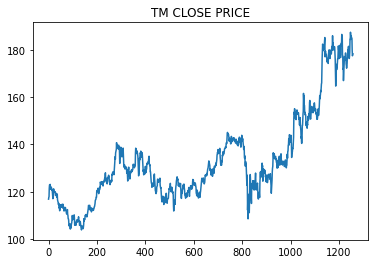

In [191]:
#isolate close column
close_price = df.reset_index()['close']

#compare plot to one above
plt.plot(close_price)
plt.title(f'{abbr} CLOSE PRICE')

In [192]:
#daily returns as a percentage
daily = close_price.pct_change()

#risk
risk = daily.dropna()

#time and delta value
days = 7 #1 week since that is our time limit
delta = 1/days

def monte_carlo(mu, sig, days, start):
    #define price array
    price = np.zeros(days) ##array full of 0s
    price[0] = start
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    #calculations for the price array for the number of days
    for x in range(1,days):
        shock[x] = np.random.normal(loc = mu * delta, scale = sig * np.sqrt(delta))
        drift[x] = mu * delta
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    return price

Text(0.5, 1.0, 'MC for TM stock')

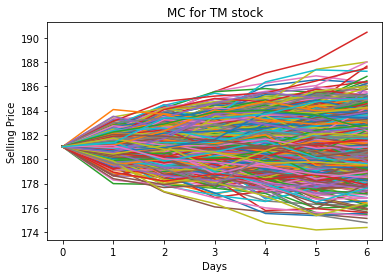

In [193]:
#variable to hold name sp i dont have to rewrite code like last time
#'ABC','COST','DELL','MSFT','TM'

mu = daily.mean()
sig = daily.std()

simulations = np.zeros(1000)

for run in range(1000):
    simulations[run] = monte_carlo(mu,sig,days,start)[days-1]
    plt.plot(monte_carlo(mu,sig,days,start))
    
#plot
plt.xlabel('Days') 
plt.ylabel('Selling Price')
plt.title(f'MC for {abbr} stock')    

Text(0.5, 1.0, 'Final price for TM after 7 days')

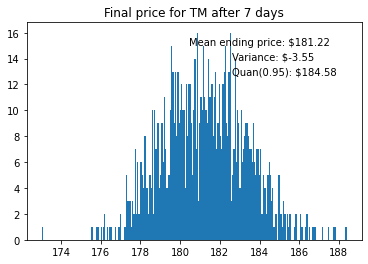

In [194]:
#95 percentile
quant = np.percentile(simulations,95)

#plot end prices
plt.hist(simulations, bins = 250)

#mean ending 
#$%.2f special two after point
plt.figtext(0.5, 0.80, 'Mean ending price: $%.2f'%simulations.mean())

#variance
plt.figtext(0.6, 0.75, 'Variance: $%.2f'%(start-quant,))

#5% 
plt.figtext(0.6, 0.70, 'Quan(0.95): $%.2f'% quant)

#after string /s
plt.title(f'Final price for {abbr} after %s days' %days)

## Monte Carlo Results

| Symbol | Company | Description | Mean Ending Price | Approx. Risk | Projected Loss/Gain per stock|
| :--- | :--- | :--- | :--- | :--- | :--- |
| ABC | Amerisourcebergen Corp. | Drug wholesale | 125.27 | 10 | +0.17 |
| COST | Costco Wholesale Corp | Retail | 517.97 | 20 | +0.11 |
| DELL | Dell Technologies Inc | Computer Technology | 56.87 | 6 | +.06 |
| MSFT | Microsoft | Retail | 336.77 | 25 | +0.70 |
| TM | Toyota Motor Crp | Automotive Manufacturer | 181.27 | 12 | +.24 |
| | | | Total  Gain/Loss per stock | +1.28 |

Reflecting the crash the risk has increased significantly for both stocks.  The stock with the most risk is my Microsoft stock.  Therefore, I will look to sell it especially if the results from teh second simulation is also unfavorable.  


## Stock Market Prediction and Forecasting Using Stacked LSTM

### First Step: Collecting Stock Data

In [195]:
#before transformation
close_price

0       116.83
1       117.56
2       117.88
3       121.46
4       122.81
         ...  
1253    184.81
1254    179.83
1255    177.47
1256    177.85
1257    178.29
Name: close, Length: 1258, dtype: float64

In [196]:
from sklearn.preprocessing import MinMaxScaler

#value from btw 0-1
scaler = MinMaxScaler(feature_range=(0,1))
close_price = scaler.fit_transform(np.array(close_price).reshape(-1,1))

#after transformation
close_price

array([[0.1556034 ],
       [0.16433441],
       [0.1681617 ],
       ...,
       [0.88087549],
       [0.8854204 ],
       [0.89068293]])

### Second Step: Preprocess Data

In [197]:
#split data into train and test split
training_size = int(len(close_price)*.65) #split percentage is 65%
test_size = len(close_price) - training_size
train_data = close_price[0:training_size,:]
test_data = close_price[training_size:len(close_price),:1]

#check
training_size, test_size, len(train_data), len(test_data)

(817, 441, 817, 441)

In [198]:
#preserve time, use past to predict the future but vice versa is not true
def create_dataset(dataset, time_step = 1):
    datax, datay = [], []
    for i in range(len(dataset) - time_step -1):
        a = dataset[i:(i+time_step), 0]
        datax.append(a)
        datay.append(dataset[i + time_step, 0])
    return np.array(datax), np.array(datay)

#train test split
time_step = 100 #number of features
train_x, train_y = create_dataset(train_data, time_step)
test_x, test_y = create_dataset(test_data, time_step)

### Third Step: Create a Stacked LSM model

In [199]:
#in order to create a stacked LSM model need to reshape input into
#[samples, time_steps, features] which is required for LSTM - 3D
train_x = train_x.reshape(train_x.shape[0],train_x.shape[1] , 1)
test_x = test_x.reshape(test_x.shape[0],test_x.shape[1] , 1)

#create the stacked LSM model
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [200]:
tf.__version__

'2.7.0'

In [201]:
#creating a nested LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1))) 
model.add(LSTM(50,return_sequences=True))#stacked
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_16 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_17 (LSTM)              (None, 50)                20200     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [202]:
model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 5s 190ms/step - loss: 0.0220 - val_loss: 0.0710
Epoch 2/100
12/12 [==============================] - 1s 117ms/step - loss: 0.0053 - val_loss: 0.0141
Epoch 3/100
12/12 [==============================] - 1s 116ms/step - loss: 0.0031 - val_loss: 0.0226
Epoch 4/100
12/12 [==============================] - 1s 118ms/step - loss: 0.0019 - val_loss: 0.0081
Epoch 5/100
12/12 [==============================] - 1s 118ms/step - loss: 0.0016 - val_loss: 0.0048
Epoch 6/100
12/12 [==============================] - 1s 118ms/step - loss: 0.0016 - val_loss: 0.0060
Epoch 7/100
12/12 [==============================] - 1s 118ms/step - loss: 0.0017 - val_loss: 0.0078
Epoch 8/100
12/12 [==============================] - 1s 118ms/step - loss: 0.0016 - val_loss: 0.0090
Epoch 9/100
12/12 [==============================] - 1s 119ms/step - loss: 0.0015 - val_loss: 0.0072
Epoch 10/100
12/12 [==============================] - 1s 118ms/step - loss: 0.0015 - val_lo

12/12 [==============================] - 1s 119ms/step - loss: 4.0840e-04 - val_loss: 0.0010
Epoch 80/100
12/12 [==============================] - 1s 119ms/step - loss: 3.5186e-04 - val_loss: 0.0016
Epoch 81/100
12/12 [==============================] - 1s 119ms/step - loss: 3.6734e-04 - val_loss: 8.7350e-04
Epoch 82/100
12/12 [==============================] - 1s 118ms/step - loss: 3.4243e-04 - val_loss: 8.4004e-04
Epoch 83/100
12/12 [==============================] - 1s 122ms/step - loss: 3.4108e-04 - val_loss: 8.1699e-04
Epoch 84/100
12/12 [==============================] - 2s 129ms/step - loss: 3.3723e-04 - val_loss: 8.7872e-04
Epoch 85/100
12/12 [==============================] - 2s 138ms/step - loss: 3.6401e-04 - val_loss: 9.6424e-04
Epoch 86/100
12/12 [==============================] - 2s 138ms/step - loss: 3.4889e-04 - val_loss: 8.5171e-04
Epoch 87/100
12/12 [==============================] - 1s 119ms/step - loss: 3.1857e-04 - val_loss: 0.0010
Epoch 88/100
12/12 [===============

### Step 4: Predict the test data and plot the output

In [203]:
#prediction for x_train and x_test
train_predict = model.predict(train_x)
test_predict = model.predict(test_x)

#back into og data
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

#calculate RMSE performance metrics
import math

from sklearn.metrics import mean_squared_error

#result for training dataset
math.sqrt(mean_squared_error(train_y,train_predict))

126.4713776743294

In [204]:
#results for test data RMSE
math.sqrt(mean_squared_error(test_y,test_predict))

157.98209771809937

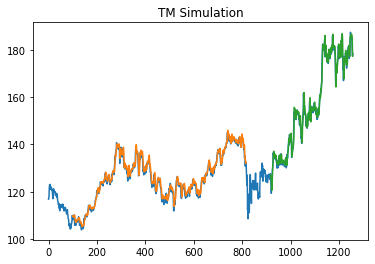

In [205]:
#plot the graph
look_back=100
trainPredictPlot = np.empty_like(close_price)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

#shift test predictions for plotting
testPredictPlot = np.empty_like(close_price)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close_price) - 1, :] = test_predict

#plot baseline and predictions
plt.plot(scaler.inverse_transform(close_price))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title(f'{abbr} Simulation')
plt.show()

#test prediction in green, orange is train prediction, blue whole set data

### Step 5: Predict the future 

In [206]:
len(test_data)

441

In [207]:
from numpy import array

num = len(test_data) - 100

#to use 100 data points for prediction value 341
x_input = test_data[num:].reshape(1,-1)
x_input.shape #check

(1, 100)

In [208]:
#make list of previous 100 data
temp_input = list(x_input)
temp_input = temp_input[0].tolist() 

In [209]:
lst_output = []
n_steps = 100
i = 0
while(i < 7): #predict next week
    
    if(len(temp_input) > 100): #more than 100 shift one position to right 

        #print(temp_input)
        x_input = np.array(temp_input[1:]) #shift one to right new op as ip
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1) #reshape
        x_input = x_input.reshape((1, n_steps, 1))
        
        #print(x_input)
        y_pred = model.predict(x_input, verbose=0) #predict
        print("{} day output {}".format(i,y_pred))
        temp_input.extend(y_pred[0].tolist())
        temp_input = temp_input[1:]
        
        #print(temp_input)
        lst_output.extend(y_pred.tolist())
        i = i + 1
    else:
        #use the 100 data point to predict
        x_input = x_input.reshape((1, n_steps,1)) #reshapes the data like before
        y_pred = model.predict(x_input, verbose=0)
        print(y_pred[0])
        temp_input.extend(y_pred[0].tolist())
        print(len(temp_input))

        #add to the temp_input
        lst_output.extend(y_pred.tolist()) 
        i = i + 1
    

print(lst_output)

[0.9107083]
101
1 day input [0.91113503 0.89833752 0.88876929 0.86688195 0.88864968 0.90730774
 0.88709485 0.90934099 0.90515489 0.89247698 0.90958019 0.92811865
 0.90922139 0.93362038 0.98229877 0.93720847 0.94534147 0.91974644
 0.9179524  0.909939   0.92764023 0.92237771 0.92716182 0.91831121
 0.8892477  0.86006459 0.77418969 0.72766416 0.77646215 0.80373161
 0.83638321 0.81054898 0.83793805 0.82573855 0.84212415 0.86580553
 0.86616433 0.90240402 0.93074991 0.91113503 0.91197225 0.86688195
 0.89271618 0.90383925 0.93158713 0.934338   0.92249731 0.87178567
 0.93385959 0.9301519  0.94450425 0.94187298 0.98911613 0.96914245
 0.97631862 0.88422438 0.88266954 0.81318024 0.81712714 0.75529243
 0.78519316 0.81509389 0.85312762 0.87680899 0.860543   0.85743332
 0.86652314 0.89379261 0.89522784 0.88422438 0.83961249 0.83219711
 0.81820356 0.82980505 0.84044971 0.8690348  0.87011123 0.91089583
 0.90647052 0.92393254 0.92883626 0.90252362 0.91687597 0.86712116
 0.87955986 0.89953355 0.96376032 

In [210]:
#graph
new_day = np.arange(1,101) #previous 100 
prediction_day = np.arange(101,108) #week prediction

#by doing this I was able to catch my error I originlly hardcoded a value
len(close_price)

1258

Text(0.5, 1.0, 'TM Prediction')

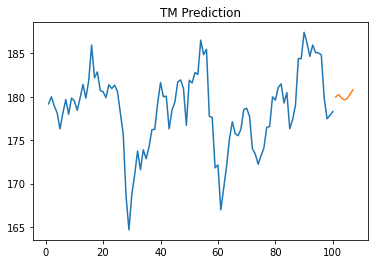

In [211]:
num = len(close_price) - 100

plt.plot(new_day,scaler.inverse_transform(close_price[num:]))
plt.plot(prediction_day,scaler.inverse_transform(lst_output))
plt.title(f'{abbr} Prediction')

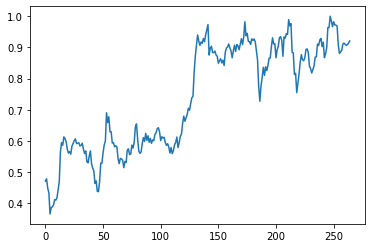

In [212]:
#combine to see all data
predict = close_price.tolist()
predict.extend(lst_output) #adding output to end
plt.plot(predict[1000:])

## Stacked LSTM Model Results


| Symbol | Company | Description | General Loss/Gain |
| :--- | :--- | :--- | :--- |
| ABC | Amerisourcebergen Corp. | Drug wholesale | Huge Loss | 
| COST | Costco Wholesale Corp | Retail | Slight Loss |
| DELL | Dell Technologies Inc | Computer Technology | Slight Loss |
| MSFT | Microsoft | Retail | Huge Loss |
| TM | Toyota Motor Crp | Automotive Manufacturer | Slight Gain | 



## Decision

Since both predictions for MSFT stock were unfavorable I decided to sell all my MSFT stock.  Since both predictions for TM were favorable I decided to buy more stock. Finally, I decided sell my ABC stock since the risk was slightly high, and the Stacked LSTM model predicted a huge loss.  


### Trades

**Sell**

| Symbol | Company | Description | Sell Price | Quantity | Total Value |
| :--- | :--- | :--- | :--- | :--- | :--- |
| ABC | Amerisourcebergen Corp. | Drug wholesale | 114.08 | 20 | 3360.70 |
| MSFT | Microsoft | Retail | 330.08 | 10 | 3360.70 |

**Buy**

| Symbol | Company | Description | Purchase Price | Quantity | Total Value |
| :--- | :--- | :--- | :--- | :--- | :--- |
| TM | Toyota Motor Crp | Automotive Manufacturer | 178.29| 25 ||
